In [ ]:
#the datasets below have been uploaded to google drive :

#human faces images dataset:
#https://drive.google.com/drive/folders/1hRaEw0WpV55G-KivyBEk2go6T7X9bb5s?usp=sharing
#Simpson faces dataset:
#https://drive.google.com/drive/folders/13la9I7LmdxQfmFhSRkVbU4l6IBkAS0Rz?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 36.67 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [ ]:

import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 8.3MB/s 
     |████████████████████████████████| 204kB 18.2MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=327df633ad1522ed3a261498e5a3b6e23c8fed1f7d05d4ed9541a9ccf9952eea
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=0daf0331e73e45e78fa10acf4468cae9a583b257b73b68c56b1ce81af5e77369
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


In [ ]:
import torch
torch.cuda.is_available()
torch.cuda.get_device_name()

'Tesla K80'

In [ ]:
LIMIT = 10000
one_epoch = ((LIMIT/100) * 50)/60 
EPOCHS = 5
print(f'{EPOCHS} epochs would take {one_epoch*EPOCHS/60} hours')

5 epochs would take 6.944444444444444 hours


In [2]:
from pathlib import Path
from fastai import *
import glob
from fastai.vision import *

TRAIN_A_NAME = 'simpsons_faces'
TRAIN_B_NAME = 'human_face'
DATASET = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/'+TRAIN_A_NAME)
TRAIN_A = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/'+TRAIN_A_NAME+'/trainA')
TRAIN_B = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/'+TRAIN_A_NAME+'/trainB')
TEST_A = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/'+TRAIN_A_NAME+'/testA')
TEST_B = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/'+TRAIN_A_NAME+'/testB')
URLS_FILE = 'urls.txt'

!rm -Rf $DATASET
os.makedirs(DATASET, exist_ok = True)
os.makedirs(TRAIN_A, exist_ok = True)
os.makedirs(TRAIN_B, exist_ok = True)
os.makedirs(TEST_A, exist_ok = True)
os.makedirs(TEST_B, exist_ok = True)

In [ ]:
def create_training_dataset_simpson_faces(download_dir):

  %cd $download_dir

  !cp -a /content/drive/MyDrive/simpson-dataset/. $download_dir


  # go back to orig directory
  %cd /content/pytorch-CycleGAN-and-pix2pix

create_training_dataset_simpson_faces(TRAIN_A)

/content/pytorch-CycleGAN-and-pix2pix/datasets/simpsons_faces/trainA
^C
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
def create_training_dataset_human_faces(download_dir):

  %cd $download_dir

  !cp -a /content/drive/MyDrive/dataset\ img\ celba/. $download_dir


  # go back to orig directory
  %cd /content/pytorch-CycleGAN-and-pix2pix

create_training_dataset_human_faces(TRAIN_B)

/content/pytorch-CycleGAN-and-pix2pix/datasets/simpsons_faces/trainB
^C
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
ls

CycleGAN.ipynb  docs/            LICENSE   pix2pix.ipynb     scripts/  util/
data/           environment.yml  models/   README.md         test.py
datasets/       imgs/            options/  requirements.txt  train.py


In [ ]:
pwd

'/content/pytorch-CycleGAN-and-pix2pix'

In [ ]:
import argparse
import numpy as np
import PIL.Image
import re
import sys
from io import BytesIO
import IPython.display
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio

In [ ]:
# move images to a new folder
# `images` is the existing image directory: 
# `new_dir` is the path that the images will be moved to
# `files_limit` is the limit of files that will be moved
def move_all_images_to_new_folder(images, new_dir, files_limit = None):
  files = glob.glob(str(images/'*.*g'))

  if(files_limit is not None):
    files = files[:files_limit]

  for file in files: shutil.move(file, new_dir/os.path.basename(file))

move_all_images_to_new_folder(TRAIN_A, new_dir = TEST_A, files_limit = int(min(LIMIT*0.1, 25)))
move_all_images_to_new_folder(TRAIN_B, new_dir = TEST_B, files_limit = int(min(LIMIT*0.1, 25)))

In [2]:
import PIL
import random

def plot_from_image_path(path, title):

  all_imgs = glob.glob(str(path/'*.*g'))

  print(f'{len(all_imgs)} imgs in {title} directory')

  img_path = random.choice(all_imgs)
  img = PIL.Image.open(img_path)
  plt.imshow(img)
  plt.title(title)
  plt.show()

plot_from_image_path(TRAIN_A, 'TRAIN_A')
plot_from_image_path(TRAIN_B, 'TRAIN_B')

plot_from_image_path(TEST_A, 'TEST_A')
plot_from_image_path(TEST_B, 'TEST_B')

In [ ]:
import gc; gc.collect()
NAME = 'person2simpson'
BATCH_SIZE = 2

In [ ]:
import os
from pathlib import Path
from distutils.dir_util import copy_tree
import matplotlib.pyplot as plt
import random

def copy_to_drive(folder = 'cyclegan_simpsonify'):

  drive_folder = Path('/content/drive/My Drive/')/folder

  if(drive_folder.exists()):
    shutil.rmtree(drive_folder)

  shutil.copytree('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/'+NAME+'/', str(drive_folder))

def get_corresponding_photo(file_path):
  return file_path.replace('fake', 'real')

def plot_results(number):

  for i in range(number):

    img_path = random.choice(glob.glob('./results/'+NAME+'/test_latest/images/*fake.*g'))
    print(img_path)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title('fake')
    plt.show()

    print(get_corresponding_photo(img_path))
    img = plt.imread(get_corresponding_photo(img_path))
    plt.imshow(img)
    plt.title('real')
    plt.show()

def get_model(src, dst):

  # copy across model
  try:
    os.remove(dst)
  except:
    pass
  shutil.copyfile(src, dst)

def copy_from_drive(folder = 'cyclegan_simpsonify'):

  drive_folder = Path('/content/drive/My Drive/')/folder

  if(not Path('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/').exists()): 
    os.mkdir('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/')

  if(Path('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/'+NAME+'/').exists()): 
    shutil.rmtree('/content/pytorch-CycleGAN-and-pix2pix/checkpoints/'+NAME+'/')

  shutil.copytree(str(drive_folder), '/content/pytorch-CycleGAN-and-pix2pix/checkpoints/'+NAME+'/')

def test_model (number_results = 5, direction = 'BtoA', src = None, dst = None):

  # delete results folder and recrete
  shutil.rmtree('./results')
  os.mkdir('./results')

  # get appropriate model
  if (src is None): src = './checkpoints/'+NAME+'/latest_net_G_'+direction.split('to')[-1]+'.pth'
  if (dst is None): dst = './checkpoints/'+NAME+'/latest_net_G.pth'

  get_model(src, dst)

  if (direction == 'BtoA'):
    test = TEST_B
  else:
    test = TEST_A
  
  cmd = 'python test.py --dataroot '+str(test)+' --name '+str(NAME)+' --model test --no_dropout'
  os.system(cmd)
  plot_results(number_results)

In [ ]:
import time
from options.train_options import TrainOptions
from data import create_dataset
from models import create_model
from util.visualizer import Visualizer
import shutil
import os
from pathlib import Path
from tqdm.notebook import tqdm


opt = TrainOptions()  # TODO: TrainOptions().parse(**args) not working. Look into this.
opt.name = NAME
opt.dataroot = TRAIN_A.parent
opt.batch_size=BATCH_SIZE
opt.beta1=0.5
opt.checkpoints_dir='./checkpoints'
opt.continue_train=False
opt.crop_size=256
opt.dataset_mode='unaligned'
opt.direction='BtoA'
opt.display_env='main'
opt.display_freq=400
opt.display_id=1
opt.display_ncols=4
opt.display_port=8097
opt.display_server='http://localhost'
opt.display_winsize=256
opt.epoch='latest'
opt.epoch_count=1
opt.gan_mode='lsgan'
opt.gpu_ids=[0]
opt.init_gain=0.02
opt.init_type='normal'
opt.input_nc=3
opt.isTrain=True
opt.lambda_A=10.0
opt.lambda_B=10.0
opt.lambda_identity=0.5
opt.load_iter=0
opt.load_size=286
opt.lr=2e-4
opt.lr_decay_iters=50
opt.lr_policy='linear'
opt.max_dataset_size=float("inf")
opt.n_epochs=EPOCHS
opt.model = 'cycle_gan'
opt.n_epochs_decay=EPOCHS//2
opt.n_layers_D=3
opt.name=NAME
opt.ndf=64
opt.netD='basic'
opt.netG='resnet_9blocks'
opt.ngf=64
opt.no_dropout=True
opt.no_flip=False
opt.no_html=False
opt.norm='instance' 
opt.num_threads=4
opt.output_nc=3
opt.phase='train'
opt.pool_size=50
opt.preprocess='resize_and_crop' 
opt.print_freq=100
opt.save_by_iter=False 
opt.save_epoch_freq=1
opt.save_latest_freq=5000
opt.serial_batches=False 
opt.suffix=''
opt.update_html_freq=1000
opt.verbose=False

In [ ]:
dataset = create_dataset(opt)
dataset_size = len(dataset)
print('The number of training images = %d' % dataset_size)

dataset [UnalignedDataset] was created
The number of training images = 1925


In [ ]:
model = create_model(opt)
model.setup(opt)
# visualizer = Visualizer(opt)
total_iters = 0

initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
model [CycleGANModel] was created
---------- Networks initialized -------------
[Network G_A] Total number of parameters : 11.378 M
[Network G_B] Total number of parameters : 11.378 M
[Network D_A] Total number of parameters : 2.765 M
[Network D_B] Total number of parameters : 2.765 M
-----------------------------------------------


In [ ]:
model.netG_A

DataParallel(
  (module): ResnetGenerator(
    (model): Sequential(
      (0): ReflectionPad2d((3, 3, 3, 3))
      (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
      (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (3): ReLU(inplace=True)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (9): ReLU(inplace=True)
      (10): ResnetBlock(
        (conv_block): Sequential(
          (0): ReflectionPad2d((1, 1, 1, 1))
          (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
          (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (3): ReLU(in

In [ ]:
model.netD_A

DataParallel(
  (module): NLayerDiscriminator(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (4): LeakyReLU(negative_slope=0.2, inplace=True)
      (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (7): LeakyReLU(negative_slope=0.2, inplace=True)
      (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (10): LeakyReLU(negative_slope=0.2, inplace=True)
      (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    )
  )
)

In [ ]:
os.mkdir('./results')

learning rate 0.0002000 -> 0.0002000


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


saving the model at the end of epoch 1, iters 1926
./results/person2simpson/test_latest/images/1863_fake.png


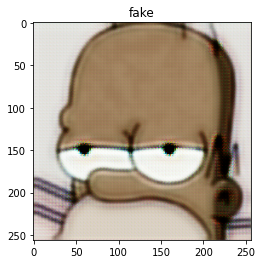

./results/person2simpson/test_latest/images/1863_real.png


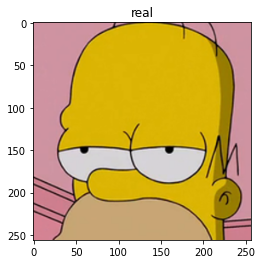

./results/person2simpson/test_latest/images/000467_fake.png


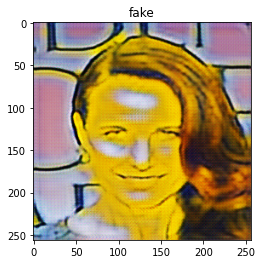

./results/person2simpson/test_latest/images/000467_real.png


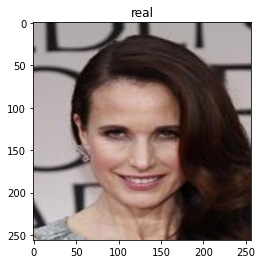

End of epoch 1 / 7 	 Time Taken: 994 sec
learning rate 0.0002000 -> 0.0002000
saving the model at the end of epoch 2, iters 3852
./results/person2simpson/test_latest/images/1813_fake.png


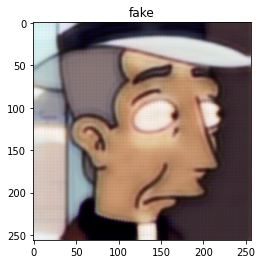

./results/person2simpson/test_latest/images/1813_real.png


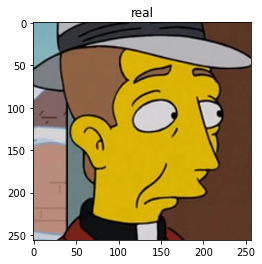

./results/person2simpson/test_latest/images/000448_fake.png


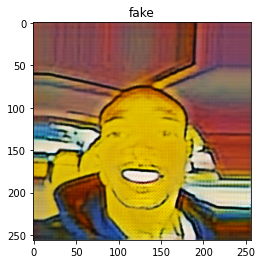

./results/person2simpson/test_latest/images/000448_real.png


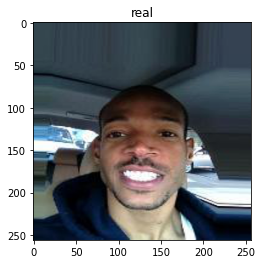

End of epoch 2 / 7 	 Time Taken: 1009 sec
learning rate 0.0002000 -> 0.0002000
saving the latest model (epoch 3, total_iters 5000)
saving the model at the end of epoch 3, iters 5778
./results/person2simpson/test_latest/images/1272_fake.png


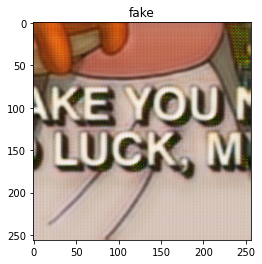

./results/person2simpson/test_latest/images/1272_real.png


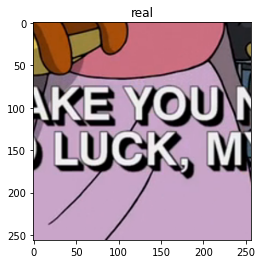

./results/person2simpson/test_latest/images/000445_fake.png


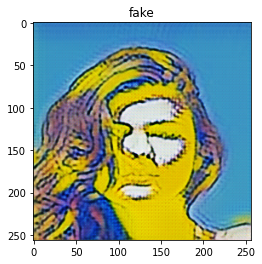

./results/person2simpson/test_latest/images/000445_real.png


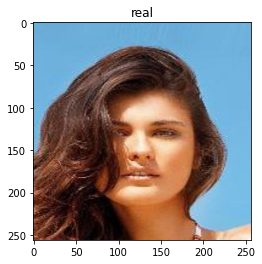

End of epoch 3 / 7 	 Time Taken: 1002 sec
learning rate 0.0002000 -> 0.0002000
saving the model at the end of epoch 4, iters 7704
./results/person2simpson/test_latest/images/1347_fake.png


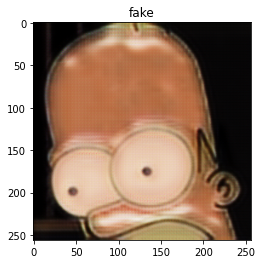

./results/person2simpson/test_latest/images/1347_real.png


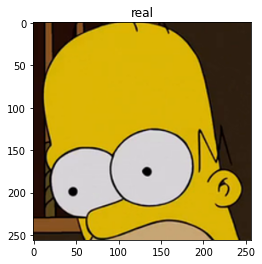

./results/person2simpson/test_latest/images/000089_fake.png


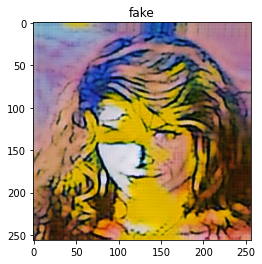

./results/person2simpson/test_latest/images/000089_real.png


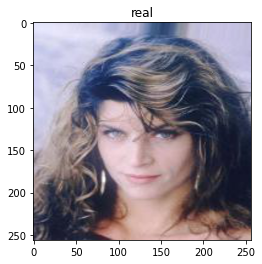

End of epoch 4 / 7 	 Time Taken: 995 sec
learning rate 0.0002000 -> 0.0001333
saving the model at the end of epoch 5, iters 9630
./results/person2simpson/test_latest/images/1604_fake.png


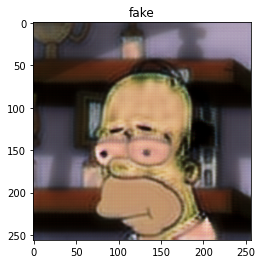

./results/person2simpson/test_latest/images/1604_real.png


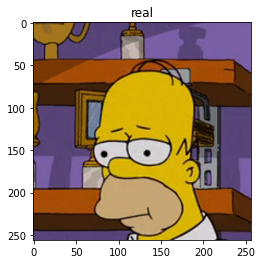

./results/person2simpson/test_latest/images/000610_fake.png


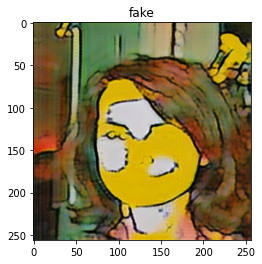

./results/person2simpson/test_latest/images/000610_real.png


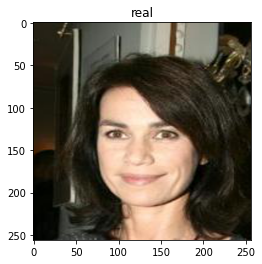

End of epoch 5 / 7 	 Time Taken: 995 sec
learning rate 0.0001333 -> 0.0000667
saving the latest model (epoch 6, total_iters 10000)
saving the model at the end of epoch 6, iters 11556
./results/person2simpson/test_latest/images/581_fake.png


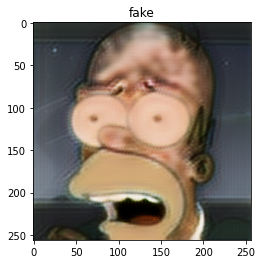

./results/person2simpson/test_latest/images/581_real.png


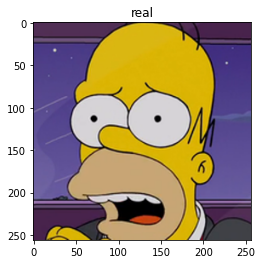

./results/person2simpson/test_latest/images/000155_fake.png


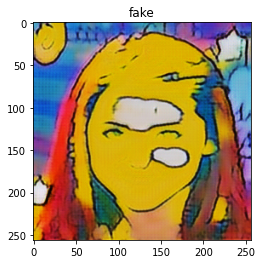

./results/person2simpson/test_latest/images/000155_real.png


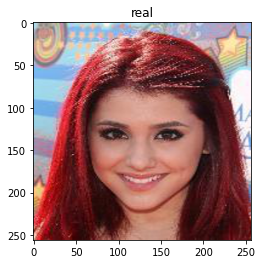

End of epoch 6 / 7 	 Time Taken: 996 sec
learning rate 0.0000667 -> 0.0000000
saving the model at the end of epoch 7, iters 13482
./results/person2simpson/test_latest/images/453_fake.png


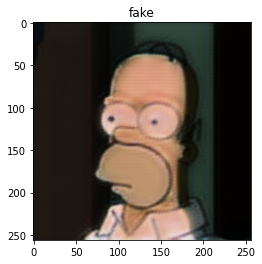

./results/person2simpson/test_latest/images/453_real.png


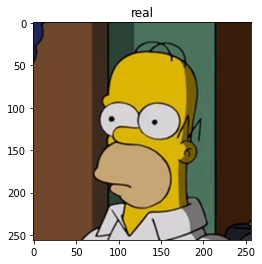

./results/person2simpson/test_latest/images/000260_fake.png


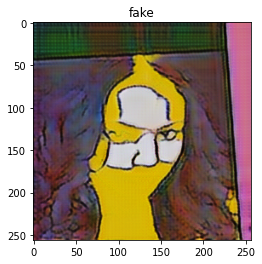

./results/person2simpson/test_latest/images/000260_real.png


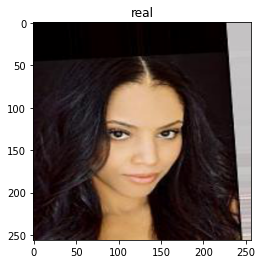

End of epoch 7 / 7 	 Time Taken: 996 sec


In [ ]:
# adapted from: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/test.py

for epoch in range(opt.epoch_count, opt.n_epochs + opt.n_epochs_decay + 1):    # outer loop for different epochs; we save the model by <epoch_count>, <epoch_count>+<save_latest_freq>
    epoch_start_time = time.time()  # timer for entire epoch
    iter_data_time = time.time()    # timer for data loading per iteration
    epoch_iter = 0                  # the number of training iterations in current epoch, reset to 0 every epoch
    # visualizer.reset()              # reset the visualizer: make sure it saves the results to HTML at least once every epoch
    model.update_learning_rate()    # update learning rates in the beginning of every epoch.
    
    for i, data in enumerate(dataset):  # inner loop within one epoch
        iter_start_time = time.time()  # timer for computation per iteration

        if total_iters % opt.print_freq == 0:
            t_data = iter_start_time - iter_data_time

        total_iters += opt.batch_size
        epoch_iter += opt.batch_size
        model.set_input(data)         # unpack data from dataset and apply preprocessing
        model.optimize_parameters()   # calculate loss functions, get gradients, update network weights

        if total_iters % opt.display_freq == 0:   # display images on visdom and save images to a HTML file
            save_result = total_iters % opt.update_html_freq == 0
            model.compute_visuals()
            # visualizer.display_current_results(model.get_current_visuals(), epoch, save_result)

        if total_iters % opt.print_freq == 0:    # print training losses and save logging information to the disk
            losses = model.get_current_losses()
            t_comp = (time.time() - iter_start_time) / opt.batch_size
            # visualizer.print_current_losses(epoch, epoch_iter, losses, t_comp, t_data)
            # if opt.display_id > 0:
            #     visualizer.plot_current_losses(epoch, float(epoch_iter) / dataset_size, losses)

        if total_iters % opt.save_latest_freq == 0:   # cache our latest model every <save_latest_freq> iterations
            print('saving the latest model (epoch %d, total_iters %d)' % (epoch, total_iters))
            save_suffix = 'iter_%d' % total_iters if opt.save_by_iter else 'latest'
            model.save_networks(save_suffix)

        iter_data_time = time.time()


    if epoch % opt.save_epoch_freq == 0:              # cache our model every <save_epoch_freq> epochs
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_iters))
        model.save_networks('latest')
        model.save_networks(epoch)
        copy_to_drive()
        test_model(1, 'AtoB')
        test_model(1, 'BtoA')

    print('End of epoch %d / %d \t Time Taken: %d sec' % (epoch, opt.n_epochs + opt.n_epochs_decay, time.time() - epoch_start_time))

In [ ]:
copy_from_drive()

./results/person2simpson/test_latest/images/000355_fake.png


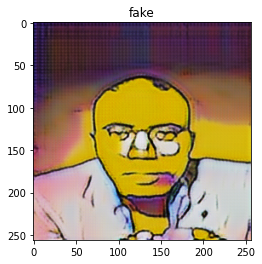

./results/person2simpson/test_latest/images/000355_real.png


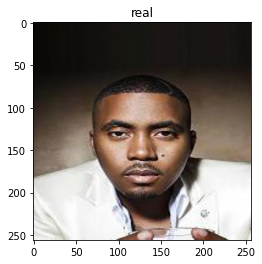

./results/person2simpson/test_latest/images/000532_fake.png


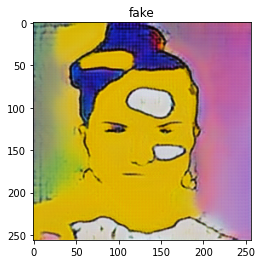

./results/person2simpson/test_latest/images/000532_real.png


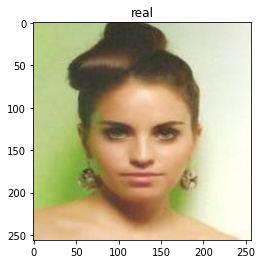

./results/person2simpson/test_latest/images/000274_fake.png


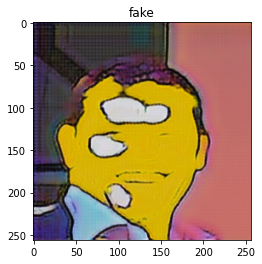

./results/person2simpson/test_latest/images/000274_real.png


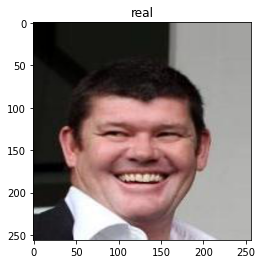

./results/person2simpson/test_latest/images/000864_fake.png


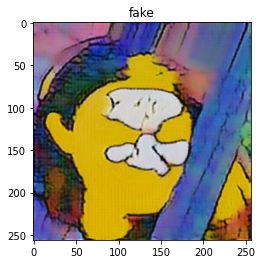

./results/person2simpson/test_latest/images/000864_real.png


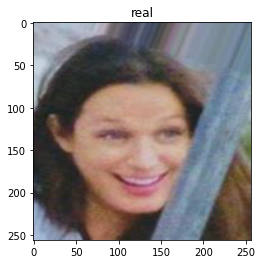

./results/person2simpson/test_latest/images/000645_fake.png


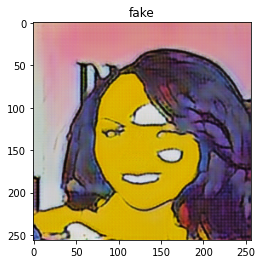

./results/person2simpson/test_latest/images/000645_real.png


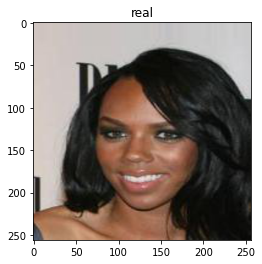

./results/person2simpson/test_latest/images/000274_fake.png


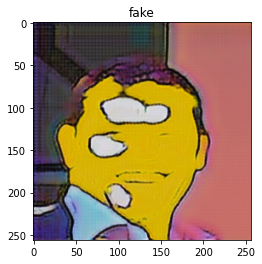

./results/person2simpson/test_latest/images/000274_real.png


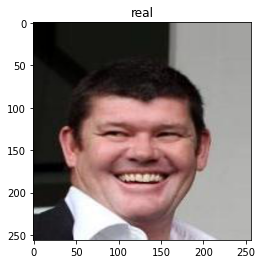

./results/person2simpson/test_latest/images/000604_fake.png


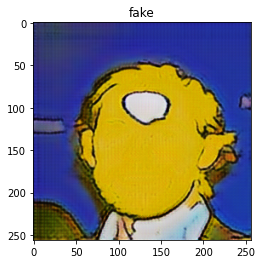

./results/person2simpson/test_latest/images/000604_real.png


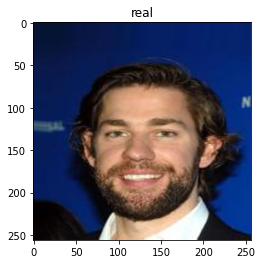

./results/person2simpson/test_latest/images/000288_fake.png


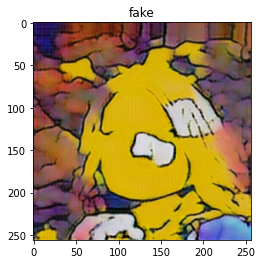

./results/person2simpson/test_latest/images/000288_real.png


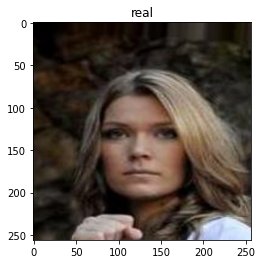

./results/person2simpson/test_latest/images/000942_fake.png


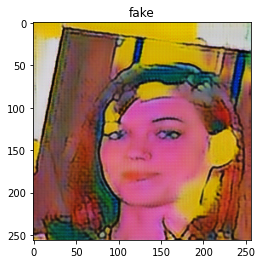

./results/person2simpson/test_latest/images/000942_real.png


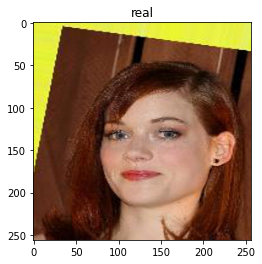

./results/person2simpson/test_latest/images/000579_fake.png


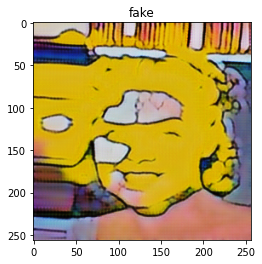

./results/person2simpson/test_latest/images/000579_real.png


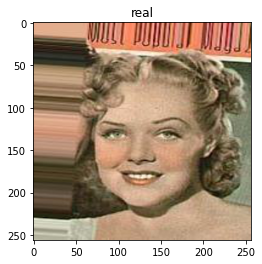

In [ ]:
test_model(10, 'BtoA')

./results/person2simpson/test_latest/images/chaky111 (1)_fake.png


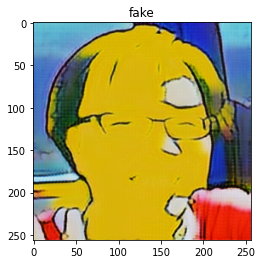

./results/person2simpson/test_latest/images/chaky111 (1)_real.png


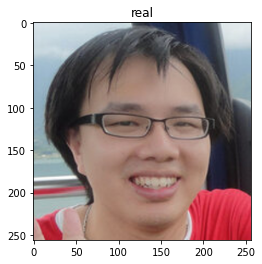

In [ ]:
def tester_model (f, src = None, dst = None):
  number_results = 1
  direction = 'BtoA'
  # delete results folder and recrete
  shutil.rmtree('./results')
  os.mkdir('./results')

  # get appropriate model
  if (src is None): src = './checkpoints/'+NAME+'/latest_net_G_'+direction.split('to')[-1]+'.pth'
  if (dst is None): dst = './checkpoints/'+NAME+'/latest_net_G.pth'

  get_model(src, dst)
  test = f

  
  cmd = 'python test.py --dataroot '+str(test)+' --name '+str(NAME)+' --model test --no_dropout'
  os.system(cmd)
  plot_results(number_results)

f = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/testing')
tester_model(f)


./results/person2simpson/test_latest/images/images_fake.png


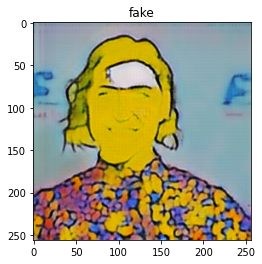

./results/person2simpson/test_latest/images/images_real.png


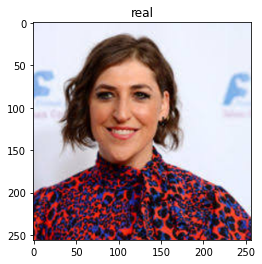

./results/person2simpson/test_latest/images/rihana_fake.png


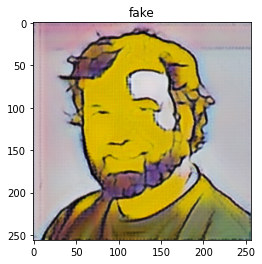

./results/person2simpson/test_latest/images/rihana_real.png


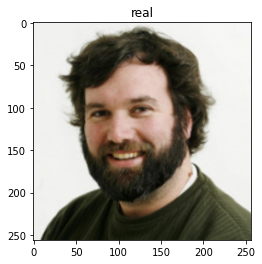

./results/person2simpson/test_latest/images/tatum_fake.png


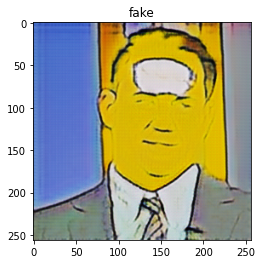

./results/person2simpson/test_latest/images/tatum_real.png


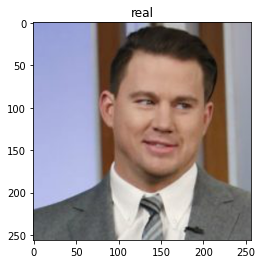

./results/person2simpson/test_latest/images/chaky111 (1)_fake.png


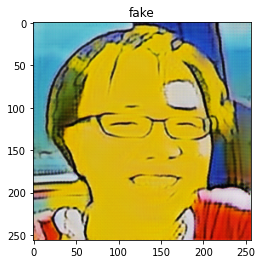

./results/person2simpson/test_latest/images/chaky111 (1)_real.png


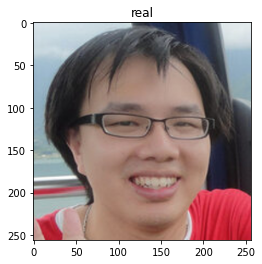

./results/person2simpson/test_latest/images/chaky111 (1)_fake.png


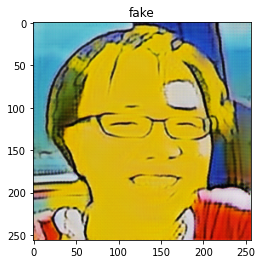

./results/person2simpson/test_latest/images/chaky111 (1)_real.png


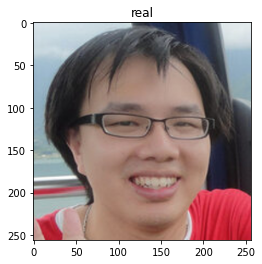

./results/person2simpson/test_latest/images/images_fake.png


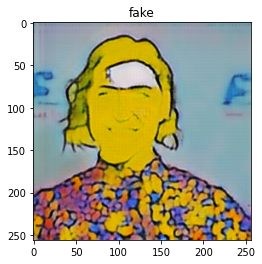

./results/person2simpson/test_latest/images/images_real.png


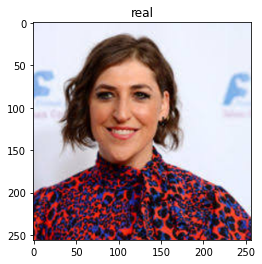

./results/person2simpson/test_latest/images/chaky111 (1)_fake.png


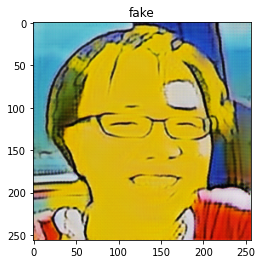

./results/person2simpson/test_latest/images/chaky111 (1)_real.png


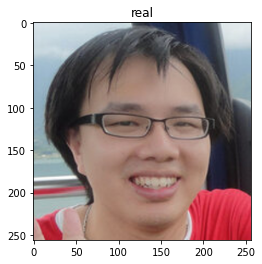

./results/person2simpson/test_latest/images/ryan_fake.png


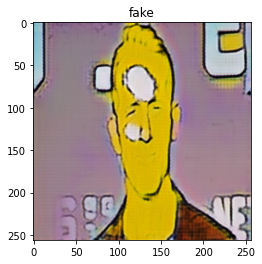

./results/person2simpson/test_latest/images/ryan_real.png


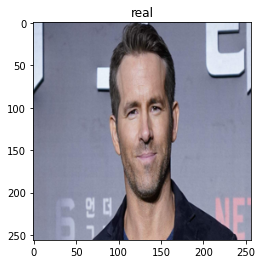

./results/person2simpson/test_latest/images/ryan_fake.png


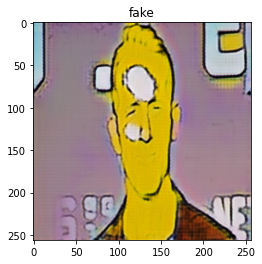

./results/person2simpson/test_latest/images/ryan_real.png


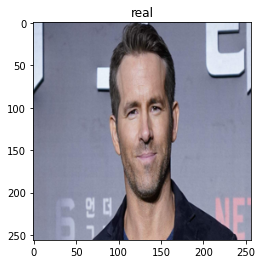

./results/person2simpson/test_latest/images/rihana_fake.png


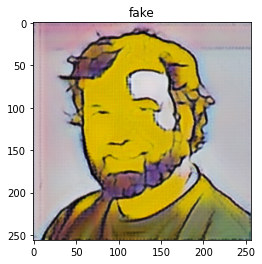

./results/person2simpson/test_latest/images/rihana_real.png


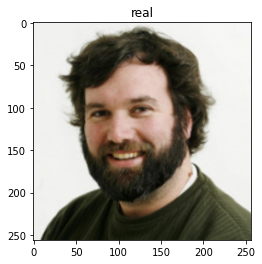

In [ ]:
def tester_model (f, src = None, dst = None):
  count = 0
  for path in pathlib.Path(".").iterdir():
      if path.is_file():
          count += 1
  number_results = count
  direction = 'BtoA'
  # delete results folder and recrete
  shutil.rmtree('./results')
  os.mkdir('./results')

  # get appropriate model
  if (src is None): src = './checkpoints/'+NAME+'/latest_net_G_'+direction.split('to')[-1]+'.pth'
  if (dst is None): dst = './checkpoints/'+NAME+'/latest_net_G.pth'

  get_model(src, dst)
  test = f

  
  cmd = 'python test.py --dataroot '+str(test)+' --name '+str(NAME)+' --model test --no_dropout'
  os.system(cmd)
  plot_results(number_results)

f = Path('/content/pytorch-CycleGAN-and-pix2pix/datasets/testing')
tester_model(f)